In [2]:
# 1. Import dataset and display first 5 rows

import pandas as pd
df=pd.read_csv("tvmarketing.csv")
df.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
# 2. Check column data types

df.dtypes

TV       float64
Sales    float64
dtype: object

In [4]:
# 3. Check the shape of the Data Frame (rows, columns)
df.shape

(200, 2)

In [5]:
# 4. Look at summary statistics
df.describe()


,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


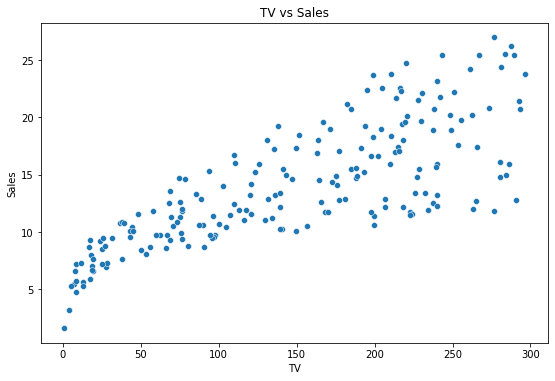

In [6]:
# 5. Visualize the relationship between the features and the dependent variable using scatterplots

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("tvmarketing.csv")

dependent_var='Sales'
features_var=df.columns.drop(dependent_var)

plt.figure(figsize=(15,10))
for i,feature in enumerate(features_var):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=feature ,y=dependent_var, data=df)
    plt.title(f"{feature} vs {dependent_var}")
    plt.xlabel(feature)
    plt.ylabel(dependent_var)
    
    
plt.tight_layout() # Adjust layout
plt.show()  # Show all subplots together
    
 


###
# we can also do this in this way also
# d=df['Sales']   
# f=df.drop(columns=['Sales'])

# plt.figure(figsize=(15,10))
# for col in f:
# #     plt.subplot(2,2)
#     sns.scatterplot(x=col,y=d,data=df)
#     plt.title(f" f vs d")
#     plt.xlabel("Tv")
#     plt.ylabel("Sales")
#     plt.show()
    

    
    
    


In [7]:
# 6. Prepare X (feature variables) and y (response variable)

x=df.drop(columns=['Sales'])
y=df['Sales']

print("x ( feature variables)\n")
print(x.head())
print("\n\ny (response variable)\n")
print(y.head())
    

x ( feature variables)

      TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8


y (response variable)

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [11]:
# 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,y_train, X_test, y_test

import pandas as pd
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Sales'])
y=df['Sales']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


train_percentage=((len(x_train))/len(df))*100
test_percentage=((len(x_test))/len(df))*100


print("shape of the train data :",x_train.shape,y_train.shape)
print("shape of the test data :",x_test.shape,y_test.shape)


print("percentage of train data :",train_percentage,"%")
print("percentage of test data :",test_percentage,"%")

shape of the train data : (140, 1) (140,)
shape of the test data : (60, 1) (60,)
percentage of train data : 70.0 %
percentage of test data : 30.0 %


In [19]:
# 8. Print the shape of train data and test data

print("shape of the train data :",x_train.shape,y_train.shape)
print("shape of the test data :",x_test.shape,y_test.shape)


shape of the train data : (140, 1) (140,)
shape of the test data : (60, 1) (60,)


In [20]:
# x_train = x_train  # convert to 1D float array
# y_train = y_train

# n=len(x_train)
# x_mean=sum(x_train)/n
# y_mean=sum(y_train)/n


# num=sum((x_train[i]-x_mean)*(y_train[i]-y_mean) for i in range(n))
# den=sum((x_train[i]-x_mean)**2 for i in range(n))


# b=num/den
# a=y_mean-b*(x_mean)


# print("mean ",x_mean," ",y_mean)
# print(n)
# print(a," ", b)


# print(f"Regression Line: Y = {a:.2f} + {b:.2f}X")



# def predect(m):
#     return a+b*(m)

# x_new =8
# y_pre=predect(x_new)

# print(y_pre)


In [21]:
# 9. Perform Linear Regression (on train data) without using any library and print the coefficients values
import numpy as np

# Prepare the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


X_train = x_train.values.reshape(-1,1)  # Using the X_train from your previous train/test split
y_train = y_train  # Convert y_train to a NumPy array for matrix operations

# Add a column of ones to X_train to account for the intercept
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias (intercept) term

# Calculate the coefficients using the Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

# Print the coefficients
print("Intercept and Coefficients for the Linear Regression Model:")
print(theta)

# Interpret the output
intercept = theta[0]
coefficients = theta[1:]
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


Intercept and Coefficients for the Linear Regression Model:
[7.23945983 0.0464078 ]
Intercept: 7.239459830751137
Coefficients: [0.0464078]


In [18]:

X = x_train.values.reshape(-1, 1)  # or x_train.to_numpy().reshape(-1, 1)
Y = y_train.values 

X_b = np.c_[np.ones((X.shape[0], 1)), X]

# print(X_b)
# print(Y)


theta=np.linalg.inv(X_b.T @ X_b)@(X_b.T@ Y)

print("intercept: " ,theta[0])
print("slop :",theta[1])
print(theta)


# predecting

def predict(M):
    m=np.c_[np.ones((M.shape[0],1)),M]
    return m@theta


x_new=np.array([[6]])
y_pred=predict(x_new)

print(f"predected value on value {x_new} pred is {y_pred}")

intercept:  7.239459830751132
slop : 0.046407802128152716
[7.23945983 0.0464078 ]
predected value on value [[6]] pred is [7.51790664]


In [40]:
# 10.Create the model using the calculated coefficients and make predictions on the testing set

x_test=x_test.reshape(-1,1)
y_test=y_test



def predict(M):
    m=np.c_[np.ones((M.shape[0],1)),M]
    return m@theta


x_new=x_test
y_pred=predict(x_new)

print(f"predected value on value {x_new} pred is {y_pred}")



for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


predected value on value [[163.3]
 [195.4]
 [292.9]
 [ 11.7]
 [220.3]
 [ 75.1]
 [216.8]
 [ 50. ]
 [222.4]
 [175.1]
 [ 31.5]
 [ 56.2]
 [234.5]
 [  5.4]
 [139.5]
 [170.2]
 [  7.3]
 [197.6]
 [ 75.3]
 [237.4]
 [229.5]
 [ 67.8]
 [ 38. ]
 [250.9]
 [ 69. ]
 [ 53.5]
 [213.5]
 [139.3]
 [ 87.2]
 [  8.4]
 [199.8]
 [ 69.2]
 [198.9]
 [ 16.9]
 [280.7]
 [238.2]
 [ 48.3]
 [273.7]
 [117.2]
 [ 27.5]
 [116. ]
 [177. ]
 [ 43.1]
 [ 62.3]
 [224. ]
 [ 38.2]
 [ 70.6]
 [147.3]
 [104.6]
 [ 76.3]
 [ 78.2]
 [168.4]
 [  8.7]
 [  7.8]
 [ 76.4]
 [129.4]
 [ 73.4]
 [289.7]
 [ 19.6]
 [197.6]] pred is [14.81785392 16.30754437 20.83230507  7.78243112 17.46309864 10.72468577
 17.30067133  9.55984994 17.56055502 15.36546598  8.7013056   9.84757831
 18.12208943  7.49006196 13.71334823 15.13806775  7.57823679 16.40964153
 10.73396733 18.25667206 17.89005042 10.38590882  9.00295631 18.88317738
 10.44159818  9.72227724 17.14752559 13.70406667 11.28622018  7.62928537
 16.5117387  10.45087974 16.46997167  8.02375169 20.26612989 

In [16]:
# 11.Perform Linear Regression using library(sklearn)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv("tvmarketing.csv")


x=df.drop(columns=['Sales'])
y=df['Sales']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# training
model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)


mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

c
print("mean square error :",mse)
print("R^2 score :",r2)



print("predicted values :",y_pred[:5])


cofficients : [0.0464078]
intercepts : 7.239459830751138
mean square error : 8.970991242413614
R^2 score : 0.6714477229302764
predicted values : [14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


In [17]:
# 12.Print the intercept and coefficients


print("cofficients :",model.coef_)
print("intercepts :",model.intercept_)

cofficients : [0.0464078]
intercepts : 7.239459830751138


In [18]:
# 13.Make predictions on the testing set - y_pred

y_pred=model.predict(x_test)


print("predicted values :",y_pred[:5])

predicted values : [14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


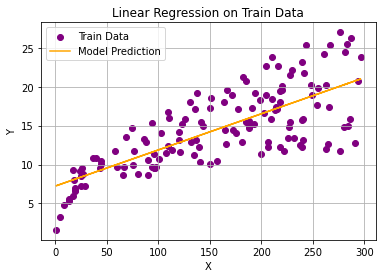

In [60]:
# 14.Plot train data and the model

import matplotlib.pyplot as plt

# Predict on test data
y_train_pred = model.predict(x_train)

# Plotting test data
plt.scatter(x_train, y_train, color='purple', label='Train Data')  # Actual points
plt.plot(x_train, y_train_pred, color='orange', label='Model Prediction')  # Prediction line
# plt.scatter(x_train,y_train_pred,color="red", label="predected", marker="x" )
# Styling
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression on Train Data")
plt.legend()
plt.grid(True)
plt.show()

/home/user/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


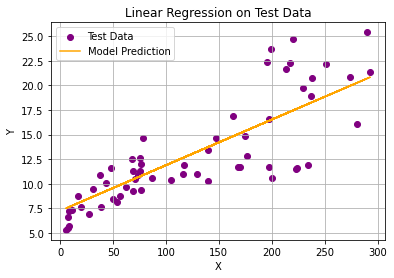

In [61]:
# 15.Plot test data and the model

import matplotlib.pyplot as plt

# Predict on test data
y_test_pred = model.predict(x_test)

# Plotting test data
plt.scatter(x_test, y_test, color='purple', label='Test Data')  # Actual points
plt.plot(x_test, y_test_pred, color='orange', label='Model Prediction')  # Prediction line
# plt.scatter(x_test,y_test_pred,color="red", label="predected")

# Styling
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression on Test Data")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# 16.Print Mean Squared Error and R Squared Value

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)



print("mean square error :",mse)
print("R^2 score :",r2)

mean square error : 8.970991242413614
R^2 score : 0.6714477229302764


In [62]:
# 17.Calculate and print R Squared and Adjusted R Squared values without any library
# Convert to NumPy arrays (if not already)
import numpy as np

y_test = np.array(y_test)
y_pred = np.array(y_test_pred)

# Step 1: R Squared
ss_res = sum((y_test - y_pred) ** 2)           # Residual Sum of Squares
ss_tot = sum((y_test - np.mean(y_test)) ** 2)  # Total Sum of Squares

r_squared = 1 - (ss_res / ss_tot)

# Step 2: Adjusted R Squared
n = len(y_test)   # number of observations
p = x_test.shape[1]  # number of predictors/features

adj_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)

# Print results
print(f"R² (R Squared): {r_squared:.4f}")
print(f"Adjusted R² : {adj_r_squared:.4f}")


R² (R Squared): 0.6714
Adjusted R² : 0.6658


In [63]:
from sklearn.metrics import r2_score
import numpy as np

# Step 1: R Squared
r2 = r2_score(y_test, y_test_pred)

# Step 2: Adjusted R Squared
n = len(y_test)               # number of test samples
p = x_test.shape[1]           # number of features (columns)

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print Results
print(f"R² (R Squared): {r2:.4f}")
print(f"Adjusted R²   : {adj_r2:.4f}")


R² (R Squared): 0.6714
Adjusted R²   : 0.6658
